In [35]:
import pandas as pd

data_folder_path = "../data/"
file_path = data_folder_path + "courses_numerical_categorical_data.csv"

# Read csv into a panda dataframe
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   udemy_id                9969 non-null   int64  
 1   title                   9969 non-null   object 
 2   instructors             9969 non-null   object 
 3   locale                  9969 non-null   object 
 4   created                 9969 non-null   object 
 5   num_subscribers         9969 non-null   int64  
 6   rating                  9969 non-null   float64
 7   num_reviews             9969 non-null   int64  
 8   num_quizzes             9969 non-null   int64  
 9   num_lectures            9969 non-null   int64  
 10  num_curriculum_items    9969 non-null   int64  
 11  category                9969 non-null   object 
 12  subcategory             9969 non-null   object 
 13  labels                  9969 non-null   object 
 14  content_length_minutes  9969 non-null   

Our target variable is the Number of subscribers `num_subscribers`. This is the defintion of success of a course. 

In [36]:
# Getting an overview of the data using summary tools
# Locally I've used the VS Code Data wrangler extension

from summarytools import dfSummary
# dfSummary(df, is_collapsible=True)

In [37]:
# Create a plotly histogram of num_subscribers column in data frame
import plotly.express as px

# Sort data frame by number od subscribers
df.sort_values(by = 'num_subscribers', ascending = False, inplace = True) 

fig = px.histogram(df, x="num_subscribers", nbins=2000)
fig.show()

fig = px.strip(df, x="num_subscribers", hover_data=df.columns)
fig.show()

fig = px.ecdf(df, x="num_subscribers")
fig.show()

fig = px.box(df, y="num_subscribers", points="all")
fig.show()

fig = px.violin(df, y="num_subscribers", points="all")
fig.show()

df

udemy_id                                              title  \
0       567828  The Complete Python Bootcamp From Zero to Hero...   
1      1565838         The Complete 2024 Web Development Bootcamp   
2      2776760  100 Days of Code: The Complete Python Pro Boot...   
12      543600  Automate the Boring Stuff with Python Programming   
8       950390  Machine Learning A-Z: AI, Python & R + ChatGPT...   
...        ...                                                ...   
9451   5535132          Ultimate Front-End Web Development Course   
8282   5622652                    Master Python for Data Handling   
9930   5800936  Airtable Mastery: Ultimate Guide to Unlock Ful...   
8805   5765290  AI-Driven Web Solutions: Python and ChatGPT Un...   
9900   5773862  YouTube Domination: Youtube Takeover Inside & Out   

                                            instructors        locale  \
0                                     ['Jose Portilla']  English (US)   
1                                     ['Dr. Angela Yu']  English (US)   
2                                     ['Dr. Angela Yu']  English (US)   
12                                      ['Al Sweigart']  English (US)   
8     ['Kirill Eremenko', 'Hadelin de Ponteves', 'Su...  English (US)   
...                                                 ...           ...   
9451                               ['Selfcode Academy']  English (US)   
8282                               ['Henrik Johansson']  English (US)   
9930              ['RPATech - Automating Intelligence']  English (US)   
8805                                 ['WAMM Marketing']  English (US)   
9900               ['WAMM Marketing', 'Bernard Martin']  English (US)   

                   created  num_subscribers    rating  num_reviews  \
0     2015-07-29T00:12:23Z          1875450  4.578222       498952   
1     2018-02-22T12:02:33Z          1219060  4.698650       365816   
2     2020-01-24T10:47:21Z          1213974  4.680867       282675   
12    2015-07-02T23:31:01Z          1120833  4.647564       112019   
8     2016-09-05T09:54:22Z          1037484  4.529762       182664   
...                    ...              ...       ...          ...   
9451  2023-09-01T10:11:48Z               84  3.710473           40   
8282  2023-10-22T21:44:42Z               80  4.930373           56   
9930  2024-02-02T23:13:15Z               74  5.000000           35   
8805  2024-01-15T12:00:00Z               55  5.000000           49   
9900  2024-01-19T12:26:28Z               44  5.000000           35   

      num_quizzes  num_lectures  num_curriculum_items     category  \
0              29           255                   284  Development   
1              12           441                   453  Development   
2              22           675                   716  Development   
12              2            51                    53  Development   
8              38           472                   510  Development   
...           ...           ...                   ...          ...   
9451            0            42                    42  Development   
8282            0            25                    25  Development   
9930            2            10                    14  Development   
8805            0            63                    63  Development   
9900            0            48                    48  Development   

                     subcategory  \
0          Programming Languages   
1                Web Development   
2          Programming Languages   
12         Programming Languages   
8                   Data Science   
...                          ...   
9451             Web Development   
8282       Programming Languages   
9930         No-Code Development   
8805         No-Code Development   
9900  Software Development Tools   

                                                 labels  \
0                                            ['Python']   
1     ['JavaScript', 'MongoDB', 'Node.Js', 'Web Deve...   
2     ['

In [38]:
df.sort_values(by = 'num_subscribers', ascending = False, inplace = True) 

# Calculate the 90th percentile value for the column of interest
threshold = df['num_subscribers'].quantile(0.9)

# Filter the dataframe to get the top 10%
df_top_10percent = df[df['num_subscribers'] >= threshold]
df_90percentile = df[df['num_subscribers'] < threshold]
df_90percentile
df_top_10percent


fig = px.histogram(df_90percentile, x="num_subscribers", nbins=2000)
fig.show()

fig = px.strip(df_90percentile, x="num_subscribers")
fig.show()

fig = px.ecdf(df_90percentile, x="num_subscribers")
fig.show()

fig = px.box(df_90percentile, y="num_subscribers", points="all")
fig.show()

fig = px.violin(df_90percentile, y="num_subscribers", points="all")
fig.show()

---
**HYPOTHESIS**

Hypothesis there

---

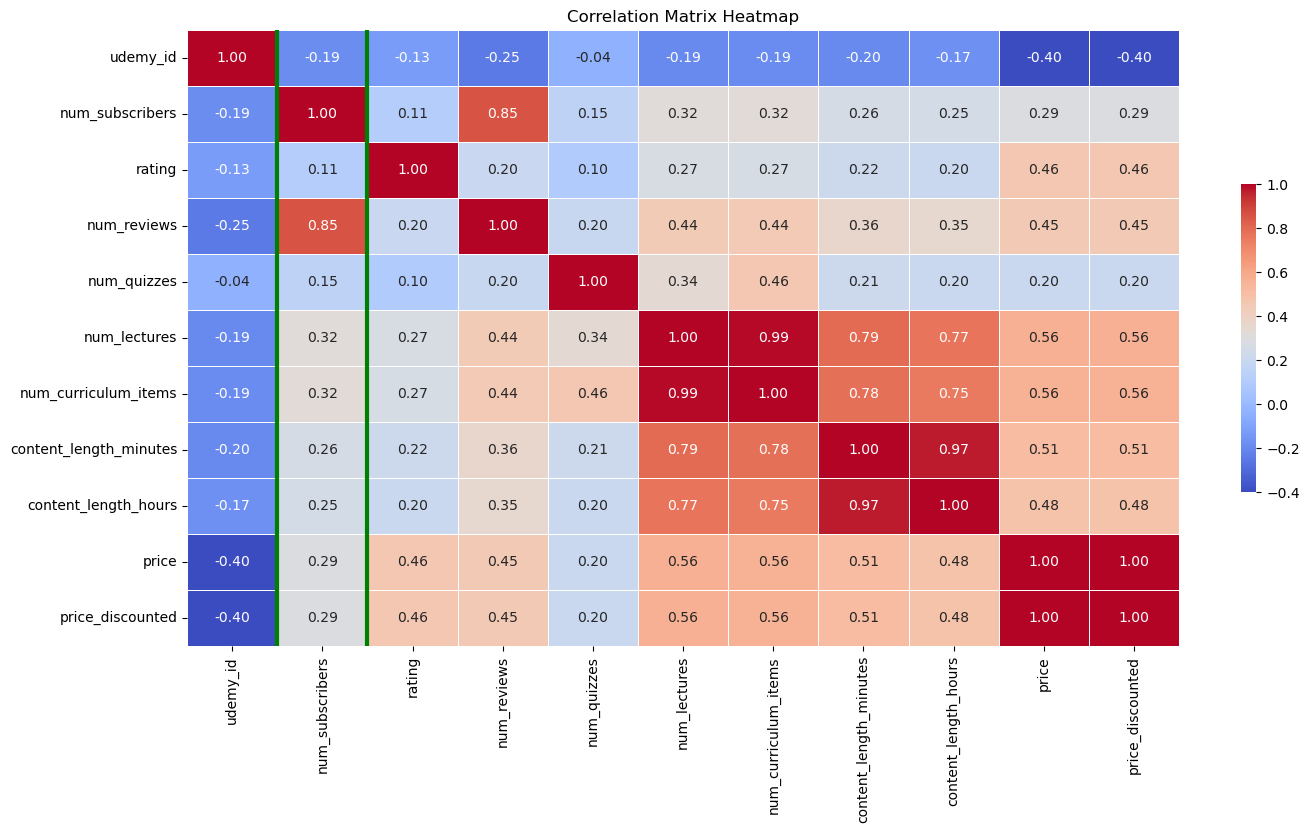

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix excluding price_prediction_price, change_reason_pricing, entered_by
# corr_matrix = df.corr(numeric_only=True) 
# corr_matrix = df_90percentile.corr(numeric_only=True) 
corr_matrix = df_top_10percent.corr(numeric_only=True) 

# Plot the heatmap
plt.figure(figsize=(16, 8))  # Optional: Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Highlighting the overpaid_ride_ticket column
col_index = corr_matrix.columns.get_loc('num_subscribers')
plt.gca().axvline(col_index, color='green', linestyle='-', linewidth=3)  # Left border
plt.gca().axvline(col_index + 1, color='green', linestyle='-', linewidth=3)  # Right border

plt.show()

In [51]:
#fig = px.imshow(corr_matrix, text_auto=True, aspect="auto", colorscale = 'Viridis')
import plotly.graph_objects as go
fig = go.Figure(data=go.Heatmap(
        z=corr_matrix,
        x=corr_matrix.columns,
        y=corr_matrix.index, 
        colorscale='Viridis'))

fig.show()